In [1]:
from dataset import MnistDataset
import matplotlib.pyplot as plt
import torch

In [2]:
trainDataset = MnistDataset(csv_path="/speech/arjun/exps/1study/generative_models/data/MNIST_CSV/mnist_train.csv")

/speech/arjun/exps/1study/generative_models/dataset.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = torch.Tensor(self.images.iloc[idx, :]).reshape(1, 28, 28)


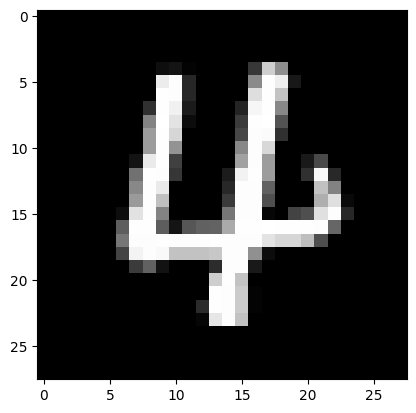

In [3]:
img, lbl = trainDataset[torch.randint(0, len(trainDataset), size=(1,)).item()]
plt.imshow(img.squeeze(), cmap="gray")

In [4]:
print(img.mean(), img.var())

tensor(36.0842) tensor(6514.0493)


In [5]:
img = (img - img.mean())/img.std()
print(img.mean(), img.var())

tensor(2.0679e-08) tensor(1.0000)


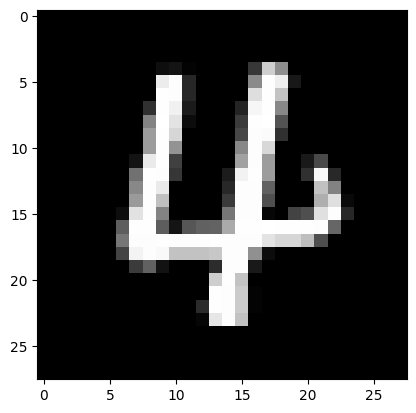

In [6]:
plt.imshow(img.squeeze(), cmap="gray")

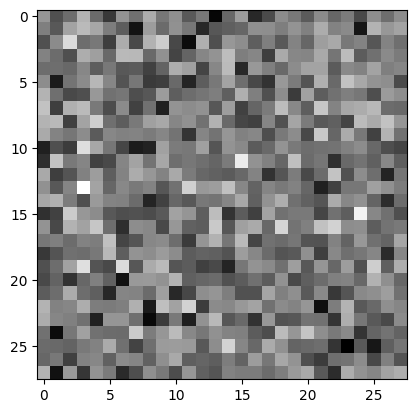

In [7]:
noise = torch.normal(0,1,(28,28))
plt.imshow(noise, cmap="gray")

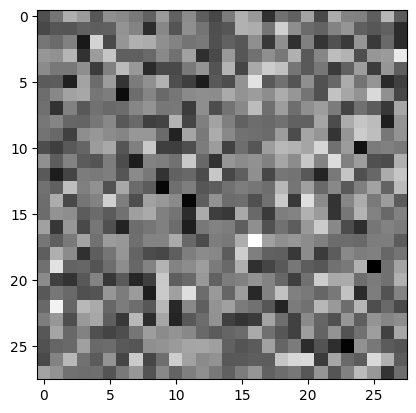

In [8]:
# noising process
noisy_img = img.clone().squeeze()
for _ in range(100000):
    noise = torch.normal(0,1,(28,28))
    noisy_img += noise

plt.imshow(noisy_img, cmap="gray")

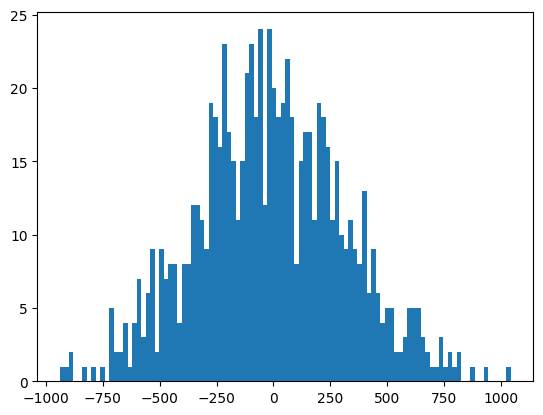

In [9]:
plt.hist(noisy_img.flatten(), bins=100);

In [10]:
print(noisy_img.mean(), noisy_img.var())

tensor(-11.5075) tensor(105883.3828)


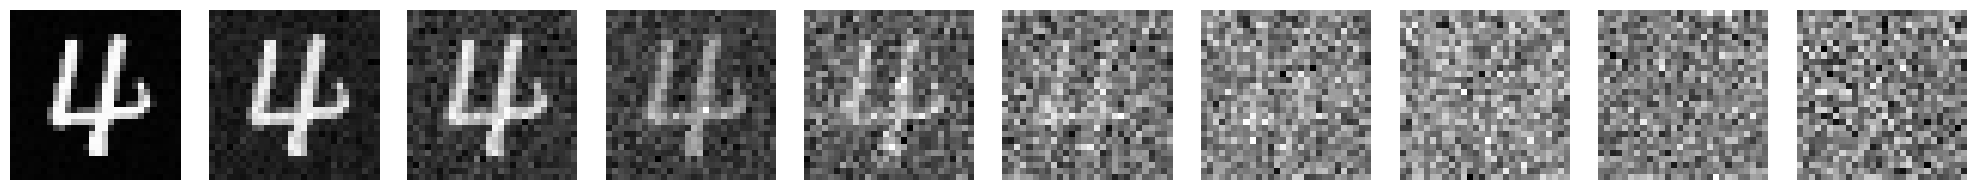

In [11]:
# noising step using beta
init_beta = 0.02
num_steps = 10
ckpt_step = num_steps / 10
beta = torch.linspace(init_beta, 1, num_steps)
noisy_img = img.clone().squeeze()
save_img = []
for t in range(num_steps):
    noisy_img = torch.normal(torch.sqrt(1-beta[t]) * noisy_img, beta[t] * torch.ones(noisy_img.shape))
    if t % ckpt_step == 0:
        save_img.append(noisy_img.clone()) 
fig, axes = plt.subplots(1, len(save_img), figsize=(len(save_img) * 2, 2))
for ax, i in zip(axes, save_img):
    ax.imshow(i, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

tensor(0.0374) tensor(1.0663)


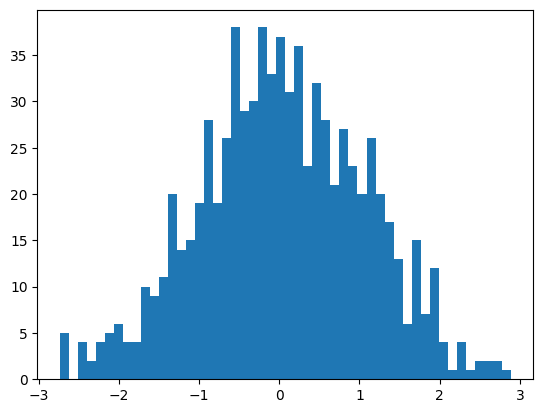

In [12]:
print(save_img[-1].mean(), save_img[-1].var())
plt.hist(save_img[-1].flatten(), bins=50);

In [13]:
# noising process using alpha


In [14]:
print(trainDataset[0][0].shape)
print(trainDataset[0][1].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [15]:
from autoencoder.model import UnetAutoEncoder
model = UnetAutoEncoder(in_channels=1, out_channels=1, init_features=16)
bottleneck, cat2, enc2, out = model(trainDataset[0][0].unsqueeze(0))
print(f"{bottleneck.shape=}")
print(f"{cat2.shape=}")
print(f"{enc2.shape=}")
print(f"{out.shape=}")

bottleneck.shape=torch.Size([1, 64, 7, 7])
cat2.shape=torch.Size([1, 64, 14, 14])
enc2.shape=torch.Size([1, 32, 14, 14])
out.shape=torch.Size([1, 1, 28, 28])


/speech/arjun/exps/1study/generative_models/dataset.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = torch.Tensor(self.images.iloc[idx, :]).reshape(1, 28, 28)
